# Visualization with Seaborn

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("classic")
%matplotlib inline
import numpy as np
import pandas as pd

In [ ]:
 # Create random data
 rng = np.random.RandomState(0)
 x = np.linspace(0, 10, 500)
 y = np.cumsum(rng.randn(500, 6), 0)
 z = np.random.randn(500)

## Matplotlib

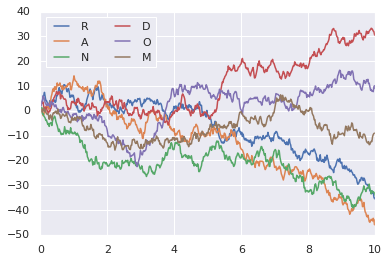

In [ ]:
# Plot
plt.plot(x, y)
plt.legend('RANDOM', ncol=2, loc="upper left")

## Seaborn

In [ ]:
import seaborn as sns
sns.set()

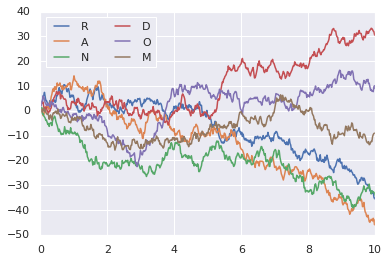

In [ ]:
# same data as above
plt.plot(x, y)
plt.legend("RANDOM", ncol=2, loc="upper left");

### Histograms, ...

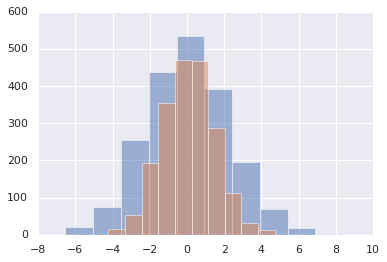

In [ ]:
data = np.random.multivariate_normal(
    [0, 0], [[5, 2], [2, 2]], size = 2000)
data = pd.DataFrame(data, columns=['x', 'y'])

# Histogram
for col in 'xy':
  plt.hist(data[col], alpha=0.5);

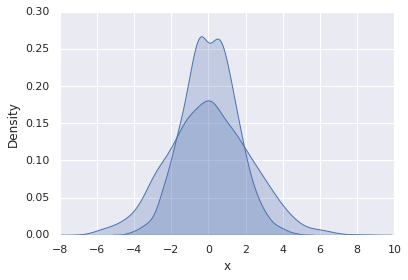

In [ ]:
# KDE
for col in 'xy':
  sns.kdeplot(data[col], shade=True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


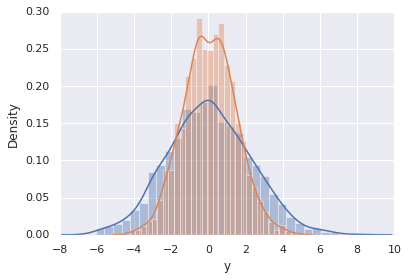

In [ ]:
# Histogram combined with KDE
sns.distplot(data['x']);
sns.distplot(data['y']);

In [ ]:
# 2-D visualization
sns.kdeplot(data);

ValueError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


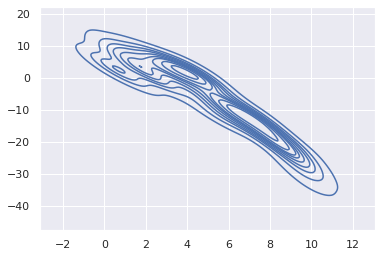

In [ ]:
sns.kdeplot(x, y[:,0]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


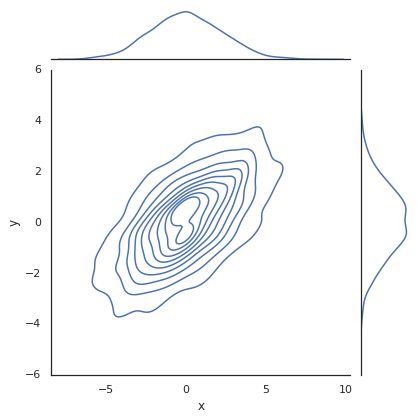

In [ ]:
with sns.axes_style('white'):
  sns.jointplot("x", "y", data, kind='kde');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


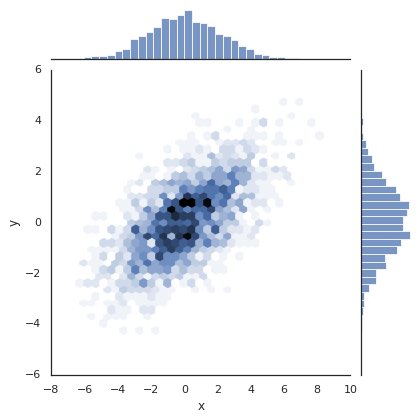

In [ ]:
with sns.axes_style('white'):
  sns.jointplot("x", "y", data, kind='hex')

In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Visualize multidimensiol relationships

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


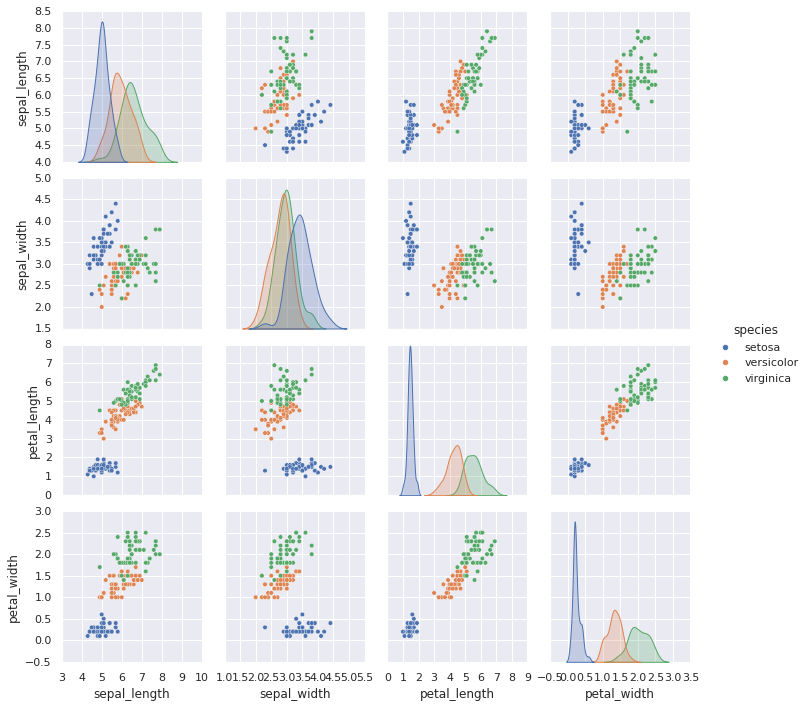

In [ ]:
sns.pairplot(iris, hue='species', size=2.5);

Faceted histograms - histograms of subsets.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


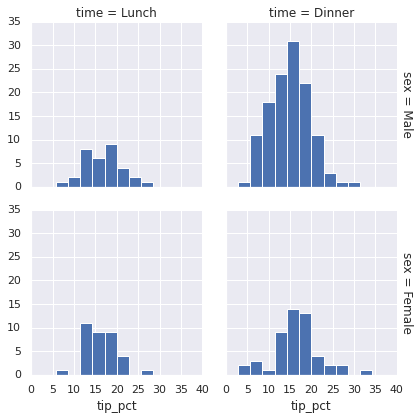

In [ ]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

Factor plots

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


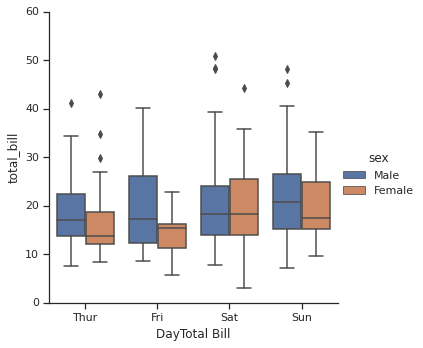

In [ ]:
with sns.axes_style(style='ticks'):
  g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box");
  g.set_axis_labels("Day" "Total Bill");

In [ ]:
## Joint distributions

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


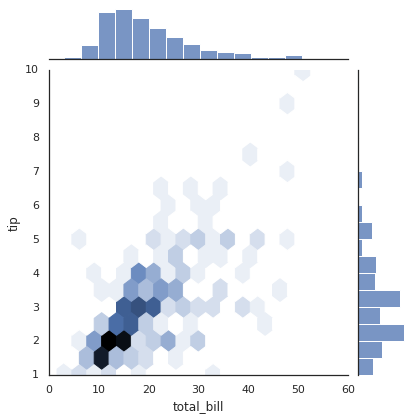

In [ ]:
with sns.axes_style('white'):
  sns.jointplot(
      "total_bill", 
      "tip", 
      data=tips, 
      kind='hex'
  )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


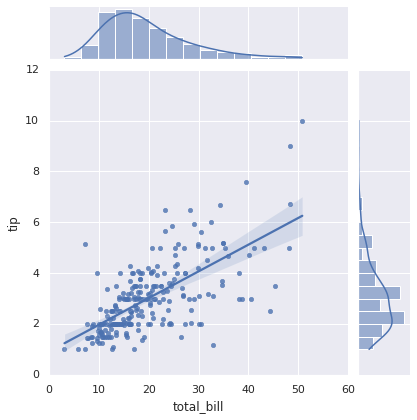

In [ ]:
sns.jointplot(
    "total_bill", 
    "tip",
    data=tips,
    kind='reg'
);

## Bar plots

In [ ]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


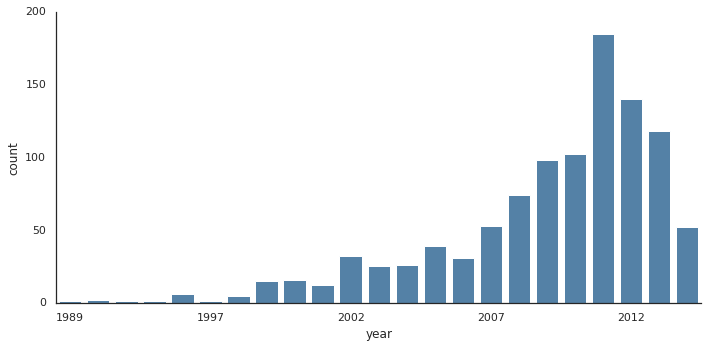

In [ ]:
with sns.axes_style('white'):
  g = sns.factorplot(
      "year",
      data=planets,
      aspect=2,
      kind="count",
      color='steelblue'
  );
  g.set_xticklabels(step=5)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


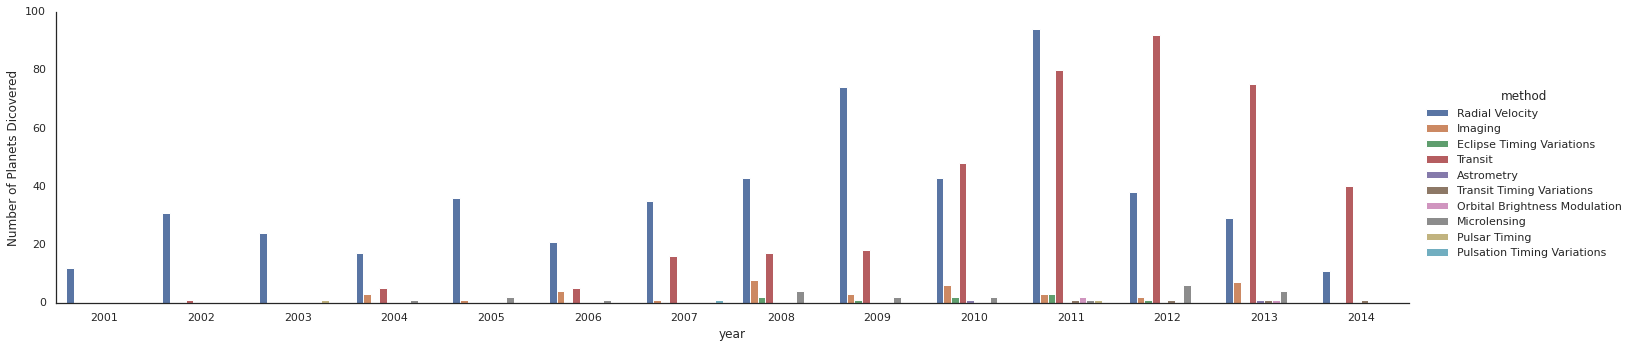

In [ ]:
with sns.axes_style('white'):
  g = sns.factorplot(
      "year", 
      data=planets,
      aspect=4.0,
      kind='count',
      hue='method',
      order=range(2001, 2015)
  )
  g.set_ylabels('Number of Planets Dicovered')

# Example: Exploring Marathon Finishin Times

In [ ]:
!wget https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv;

--2022-07-16 13:49:45--  https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 856773 (837K) [text/plain]
Saving to: ‘marathon-data.csv’

marathon-data.csv   100%[===================>] 836.69K  --.-KB/s    in 0.04s   

2022-07-16 13:49:45 (18.2 MB/s) - ‘marathon-data.csv’ saved [856773/856773]



In [ ]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [ ]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [ ]:
def convert_time(s):
  h, m, s = map(int, s.split(':'))
  return pd.datetool.timedelta(
      hours=h,
      minutes=m,
      seconds=s
  )

data = pd.read_csv(
    'marathon-data.csv',
    converters={
        'split': convert_time,
        'final': convert_time
    })

data.head()

AttributeError: ignored

In [ ]:
from pandas import datetools

ImportError: ignored